## Explore and Compare Charts

#### Objectives

 1. Single variable Exploration
 2. Comparison Charts
 
 #### Steps
 
  1. Establish data provenance.
  2. Create simple aesthetics that can be reused.
  3. Explore distribution of continuous variables.

http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
data(airquality)

#?airquality
### airquality {datasets}	R Documentation
#### New York Air Quality Measurements
Daily air quality measurements in New York, May to September 1973.

A data frame with 153 observations on 6 variables.

 [,1]	Ozone	numeric	Ozone (ppb)
 [,2]	Solar.R	numeric	Solar R (lang)
 [,3]	Wind	numeric	Wind (mph)
 [,4]	Temp	numeric	Temperature (degrees F)
 [,5]	Month	numeric	Month (1--12)
 [,6]	Day	numeric	Day of month (1--31)

##### Details
Daily readings of the following air quality values for May 1, 1973 (a Tuesday) to September 30, 1973.

Ozone: Mean ozone in parts per billion from 1300 to 1500 hours at Roosevelt Island

Solar.R: Solar radiation in Langleys in the frequency band 4000–7700 Angstroms from 0800 to 1200 hours at Central Park

Wind: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport

Temp: Maximum daily temperature in degrees Fahrenheit at La Guardia Airport.

Source
The data were obtained from the New York State Department of Conservation (ozone data) and the National Weather Service (meteorological data).

References
Chambers, J. M., Cleveland, W. S., Kleiner, B. and Tukey, P. A. (1983) Graphical Methods for Data Analysis. Belmont, CA: Wadsworth.

In [3]:
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


### Some rudimentary formatting to make the charts more pleasant to read.

In [4]:
labs <- labs(title = 'Distribution plot', 
     subtitle='Air Quality', x= 'Temperature (Degrees C)')
theme <- theme_bw()

# Single variable exploration

 - Histogram
 - Histogram with frequency polygon
 - Geom density
 - Box plot

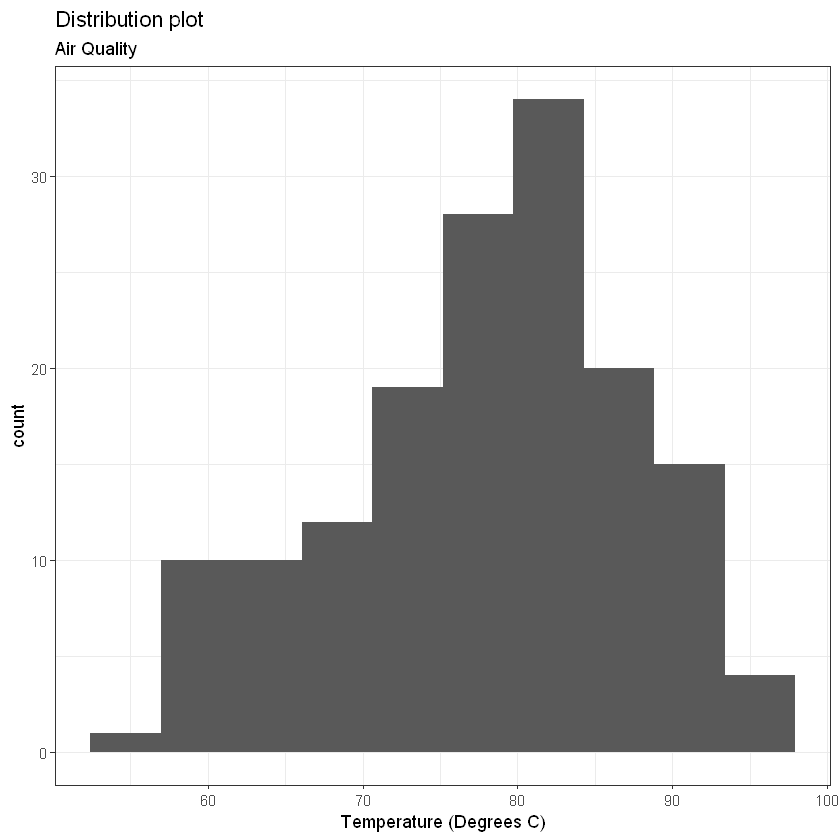

In [5]:
# basic histogram
p <- ggplot(airquality, aes(x=Temp)) + 
  geom_histogram(bins=10) + labs + theme
p

Warning message:
"Removed 37 rows containing non-finite values (`stat_bin()`)."


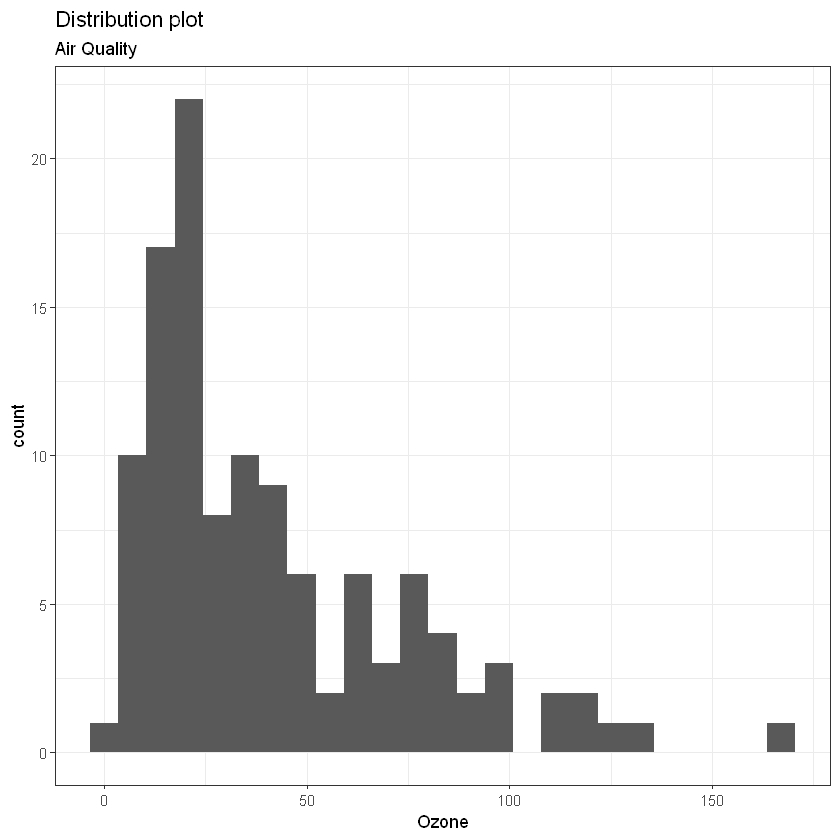

In [6]:
ggplot(airquality, aes(x=Ozone, na.rm = TRUE)) + 
  geom_histogram(bins=25) + labs + theme +
labs(x='Ozone') 

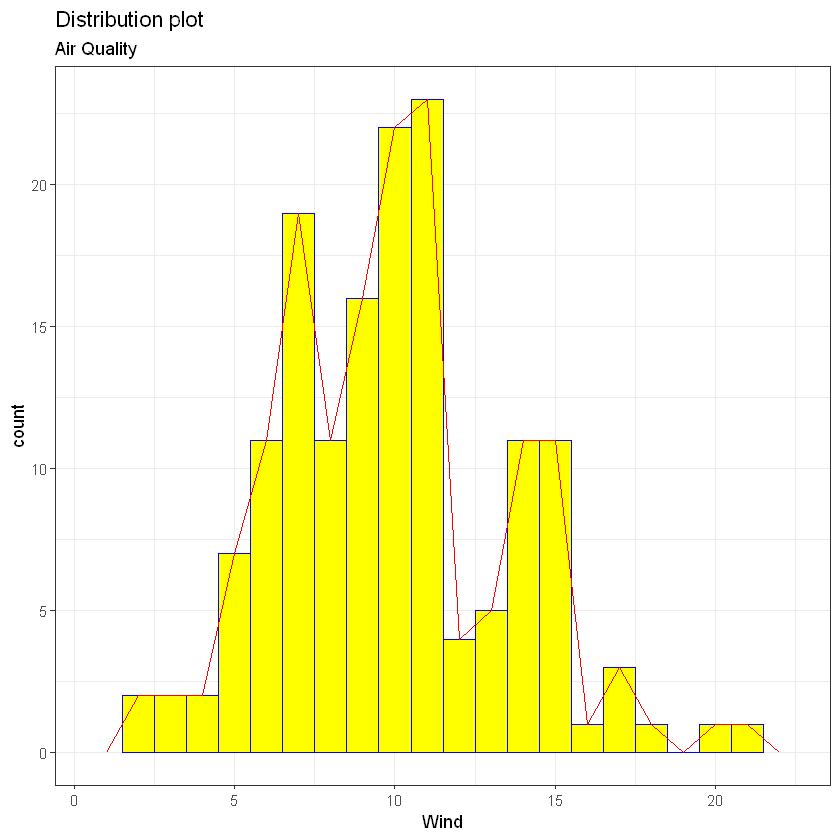

In [7]:
p <- ggplot(airquality, aes(x=Wind)) + 
  geom_histogram(bins=20,fill="Yellow", color="Blue") +
  geom_freqpoly(binwidth=1,color="Red") + labs + theme +
labs(x='Wind') 
p

Warning message:
"Removed 7 rows containing non-finite values (`stat_bin()`)."


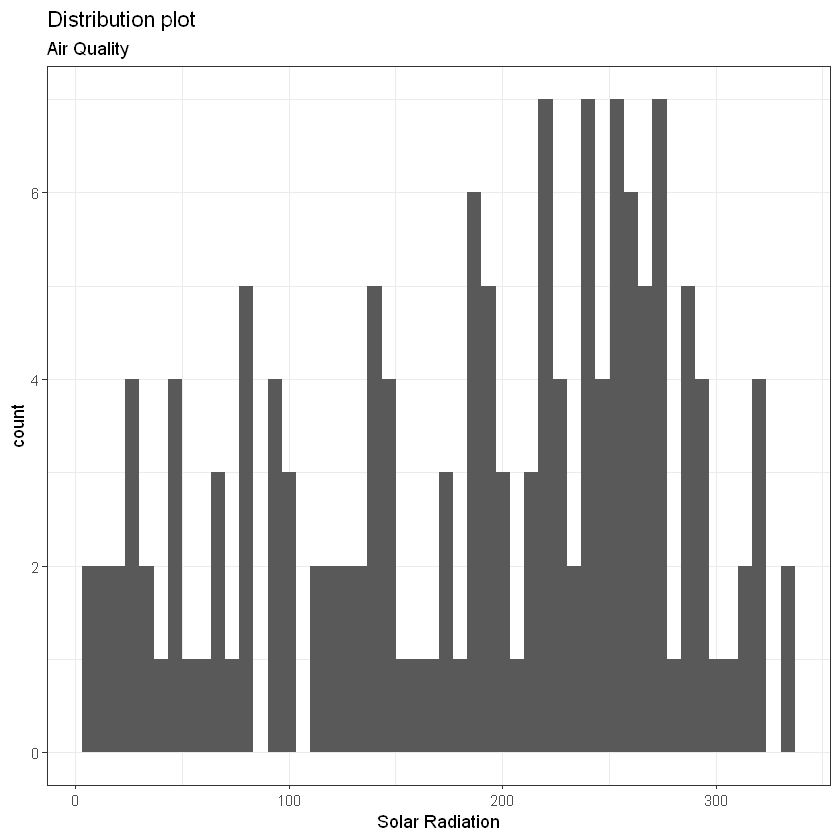

In [8]:
ggplot(airquality, aes(x=Solar.R)) + 
  geom_histogram(bins=50)+ labs + theme +
labs(x='Solar Radiation') 

### Faithful {datasets}	R Documentation

Old Faithful Geyser Data

#### Description
Waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.
####
Format
A data frame with 272 observations on 2 variables.

[,1]	eruptions	numeric	Eruption time in mins
[,2]	waiting	numeric	Waiting time to next eruption (in mins)
Details
A closer look at faithful$eruptions reveals that these are heavily rounded times originally in seconds, where multiples of 5 are more frequent than expected under non-human measurement. For a better version of the eruption times, see the example below.

There are many versions of this dataset around: Azzalini and Bowman (1990) use a more complete version.

Source
W. Härdle.

References
Härdle, W. (1991). Smoothing Techniques with Implementation in S. New York: Springer.

Azzalini, A. and Bowman, A. W. (1990). A look at some data on the Old Faithful geyser. Applied Statistics, 39, 357–365. doi:10.2307/2347385.

In [9]:
labs <- labs(title = 'Distribution plot', 
     subtitle='Old Faithful Geyser Activity', x= 'Time between eruptions')

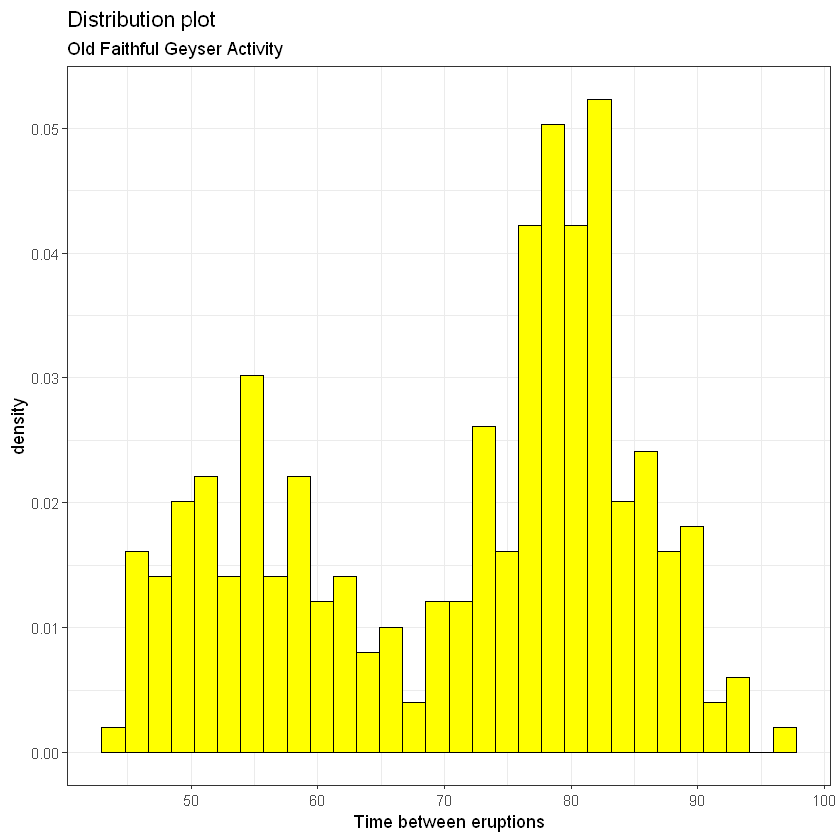

In [10]:
ggplot(faithful, aes(x = waiting)) +
    geom_histogram(bins=30, fill = "yellow", color = "black", aes(y =after_stat(density))) + labs + theme


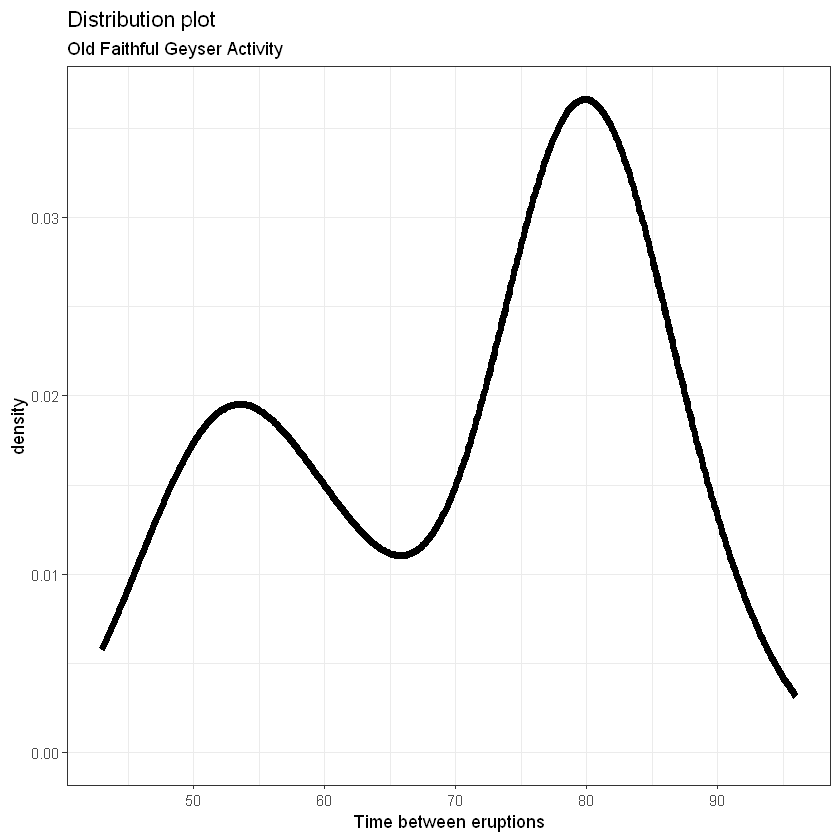

In [11]:
ggplot(faithful, aes(x = waiting)) +
geom_density(col="black", linewidth=2) + theme_bw() + labs + theme

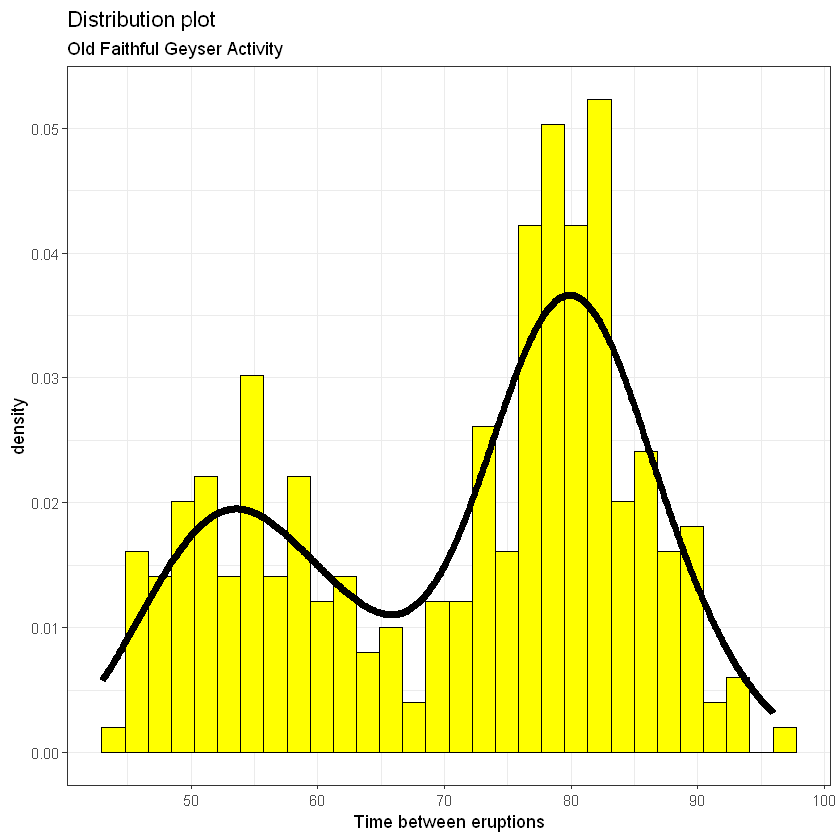

In [12]:
ggplot(faithful, aes(x = waiting)) +
    geom_histogram(bins=30, fill = "yellow", color = "black", aes(y =after_stat(density))) +
geom_density(col="black", linewidth=2) + labs + theme



https://ggplot2.tidyverse.org/reference/geom_histogram.html

#### Box Plot

 - Outliers
 - Median
 - Quartiles
 - Density functions

#### Box Plot
Box plot is an excellent tool to study distribution. It can also show the distributions within multiple groups, along with the median, range and outliers if any.

The dark line inside the box represents the median. The top of box is 75%ile and bottom of box is 25%ile. The end points of the lines (aka whiskers) is at a distance of 1.5*IQR, where IQR or Inter Quartile Range is the distance between 25th and 75th percentiles. The points outside the whiskers are marked as dots and are normally considered as extreme points.

Setting varwidth=T adjusts the width of the boxes to be proportional to the number of observation it contains.

In [13]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [14]:
mtcars$cyl = as.factor(mtcars$cyl)

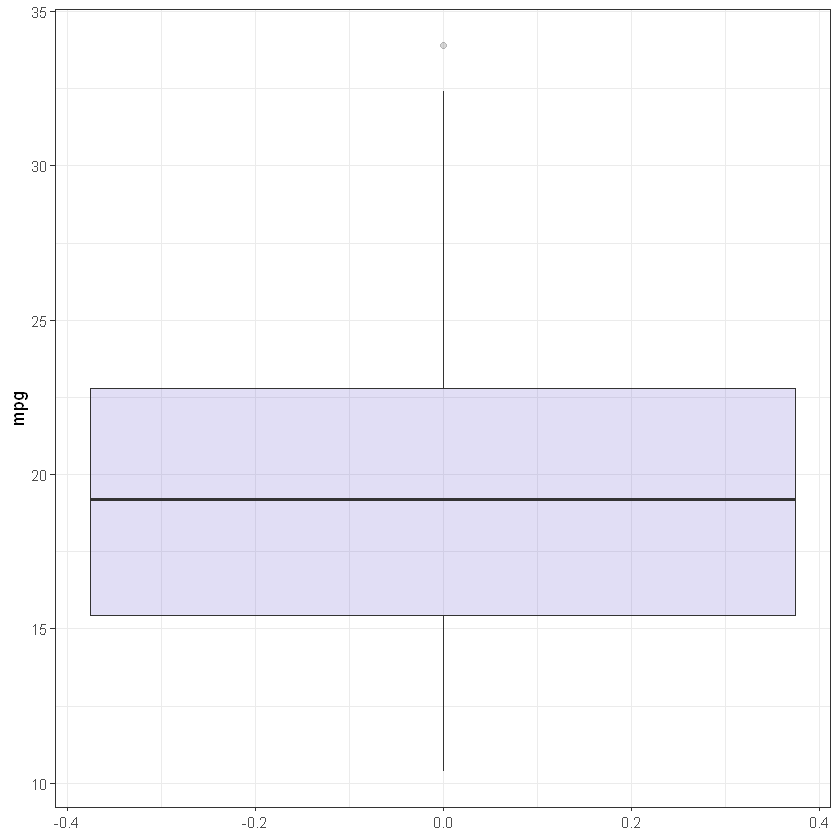

In [15]:
ggplot(mtcars,(aes(y=mpg))) + geom_boxplot(fill="slateblue", alpha=0.2) +theme_bw()

## Statistics demo:
 - List the numbers in numeric order (i.e. sorted)
 - Find the number in the middle position (median)
 - Find the number in the middle of the part below the median (Q1)
 - Find the number in the middle of the part above the median (Q3)
 - Find the interquartile range (IQR) which is Q3 - Q1
 - Minimum is number just higher than Q1 minus IQR * 1.5
 - Maximum is number just lower than Q3 plus IQR * 1.5
 
 ### There are outliers in the mpg statistics for 8-cylinder cars.  What are they?

In [16]:
lst <- sort(mtcars[mtcars$cyl==8,]$mpg)

median(lst)
quantile (lst)
qs <-quantile (lst)
IQR (lst)
qs[2] # Q3
qs[4] # Q1

IQR <- qs[4] - qs[2]
IQR * 1.5

min = 14.3 - 2.775
min

max = 15.8 + 2.775
max

[1] 15.2

0%   25%   50%   75%  100% 
10.40 14.40 15.20 16.25 19.20

[1] 1.85

25% 
14.4

75% 
16.25

75% 
2.775

[1] 11.525

[1] 18.575

#### So we have outliers...

10.4 < minimum (11.525)

19.2 > maximum (18.575)

## Stacked single variable plots

- Categorical value added

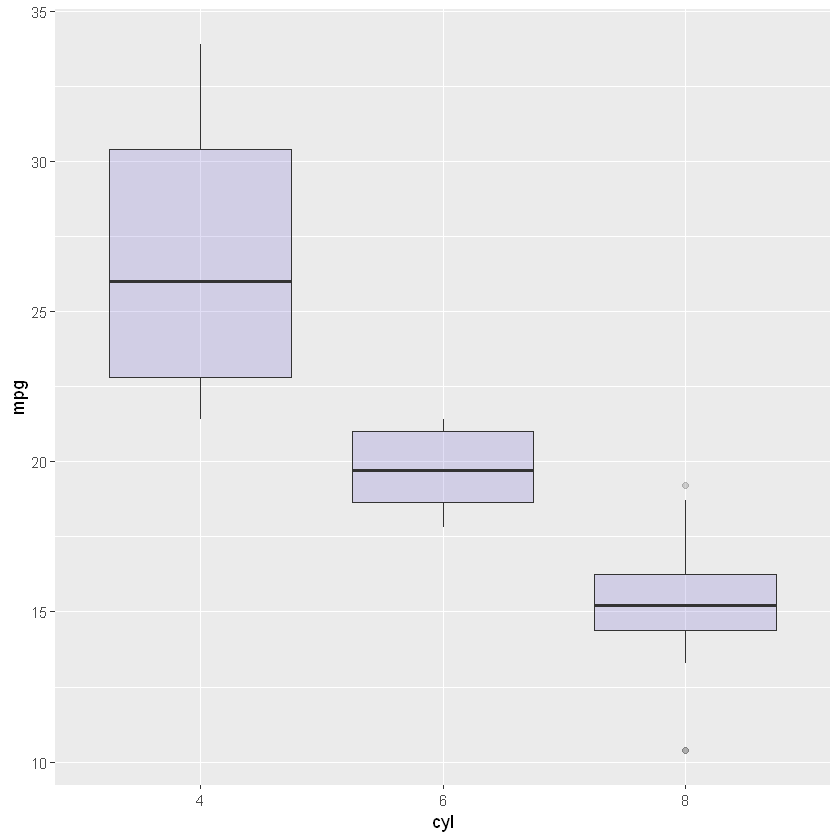

In [17]:
p1 = ggplot(mtcars, aes(x=cyl, y=mpg)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("cyl")
p1

In [18]:
p2 = ggplot(mtcars, aes(x=as.factor(gear), y=mpg, fill=gear)) + geom_boxplot()

In [19]:
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


In [20]:
theme_set(theme_classic())

# Plot
p3 <- ggplot(mpg, aes(class, cty))
p3 <- p3 + geom_boxplot(varwidth=T, fill="plum") + 
    labs(title="Box plot", 
         subtitle="City Mileage grouped by Class of vehicle",
         caption="Source: mpg",
         x="Class of Vehicle",
         y="City Mileage")

#### Violin plot

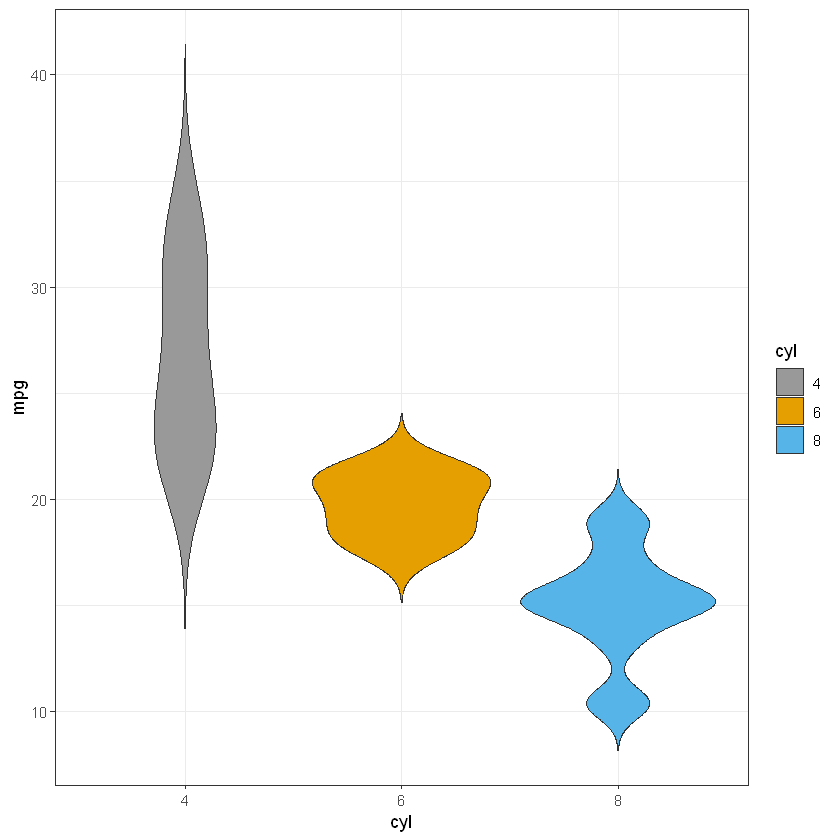

In [21]:

p4 <- ggplot(mtcars, aes(x=cyl, y=mpg, fill=cyl)) +
 scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9"))+
  geom_violin(trim=FALSE) +theme_bw() +xlab("cyl")
p4

#### Density plot

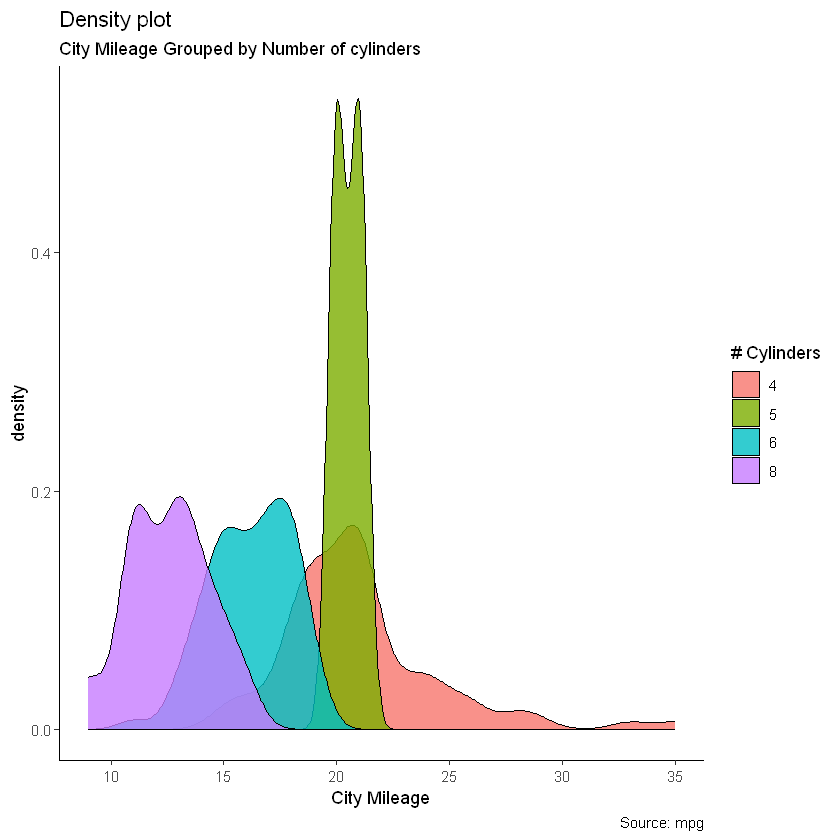

In [22]:
theme_set(theme_classic())

# Plot
p5 <- ggplot(mpg, aes(cty))
p5 <- p5 +   geom_density(aes(fill=factor(cyl)), alpha=0.8) + 
    labs(title="Density plot", 
         subtitle="City Mileage Grouped by Number of cylinders",
         caption="Source: mpg",
         x="City Mileage",
         fill="# Cylinders")
p5

## Comparison Charts


## Side-by-side Bar Chart

cyl,am,mpg
<fct>,<dbl>,<dbl>
4,0,22.90000
4,1,28.07500
6,0,19.12500
6,1,20.56667
8,0,15.05000
8,1,15.40000


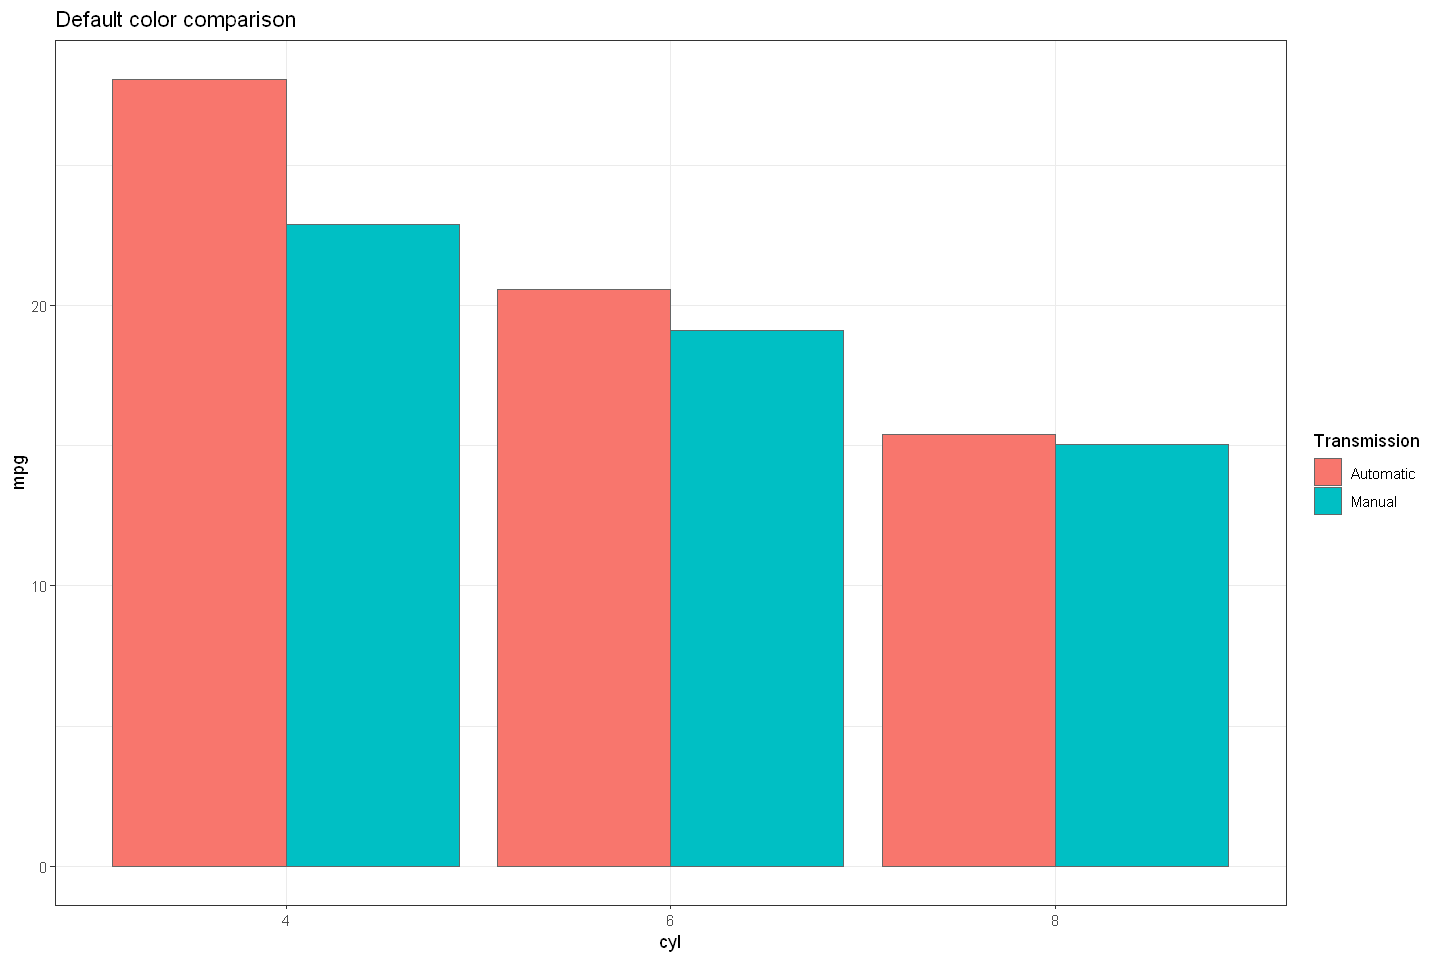

In [68]:
# Get an average value for MPG per cyl (number of cylinders) and am (transmission type (automatic or manual)) values

avg_mpg <- mtcars %>%
        group_by(cyl, am) %>%
        summarize_at(vars(mpg),list(mpg=mean))

avg_mpg

avg_mpg$Transmission = as.character(avg_mpg$am)
avg_mpg[avg_mpg$am==0,]$Transmission='Manual'
avg_mpg[avg_mpg$am==1,]$Transmission='Automatic'
p2 <- ggplot(avg_mpg, aes(cyl, mpg, fill = Transmission)) +
        geom_bar(stat = "identity", position = "dodge", color = "grey40") +
        ggtitle("Default color comparison")
p2

#### Diverging bars
Diverging Bars is a bar chart that can handle both negative and positive values. This can be implemented by a smart tweak with geom_bar().  geom_bar() can  be used to make  a histogram as well as a bar chart.

By default, geom_bar() has the stat set to count. That means, when you provide just a continuous X variable (and no Y variable), it tries to make a histogram out of the data.

In order to make a bar chart create bars instead of histogram, you need to do two things.

 - Set stat=identity
 - Provide both x and y inside aes() where, x is either character or factor and y is numeric.
 
In order to make sure you get diverging bars instead of just bars, make sure, your categorical variable has 2 categories that changes values at a certain threshold of the continuous variable. In below example, the mpg from mtcars dataset is normalised by computing the z score. Those vehicles with mpg above zero are marked green and those below are marked red.  An explanation of z-scores can be found at https://www.statisticshowto.com/probability-and-statistics/z-score/

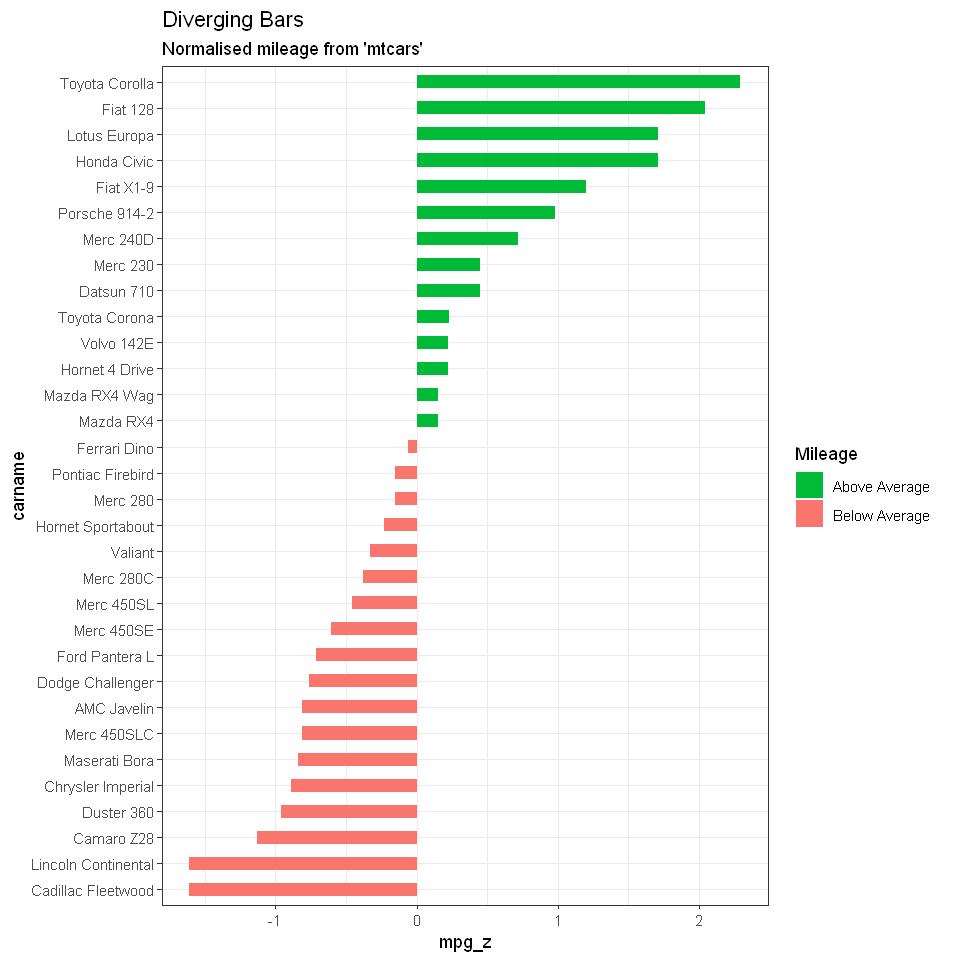

In [69]:
options(repr.plot.width=8, repr.plot.height=8)
theme_set(theme_bw())  

 # create new column for car names
mtcars$carname <- rownames(mtcars) 
# compute normalized mpg
mtcars$mpg_z <- round((mtcars$mpg - mean(mtcars$mpg))/sd(mtcars$mpg), 2)

# above / below avg flag
mtcars$mpg_type <- ifelse(mtcars$mpg_z < 0, "below", "above") 
# sort
mtcars <- mtcars[order(mtcars$mpg_z), ] 
# convert to factor to retain sorted order in plot.
mtcars$carname <- factor(mtcars$carname, levels = mtcars$carname)  

# Diverging Barcharts
p3 <- ggplot(mtcars, aes(x=carname, y=mpg_z, label=mpg_z)) + 
  geom_bar(stat='identity', aes(fill=mpg_type), width=.5)  +
  scale_fill_manual(name="Mileage", 
                    labels = c("Above Average", "Below Average"), 
                    values = c("above"="#00ba38", "below"="#f8766d")) + 
  labs(subtitle="Normalised mileage from 'mtcars'", 
       title= "Diverging Bars") + 
  coord_flip()
p3

### Present multiple plots 

Using base R, pars can be used to split plots into rows and columns, but if using ggplot, cowplot is required.

# Colour incompatibility

### See Accent principles.  What's wrong here?

To fix this, see
http://www.sthda.com/english/wiki/colors-in-r#:~:text=In%20R%2C%20colors%20can%20be,taken%20from%20the%20RColorBrewer%20package.


In [70]:
require(cowplot)

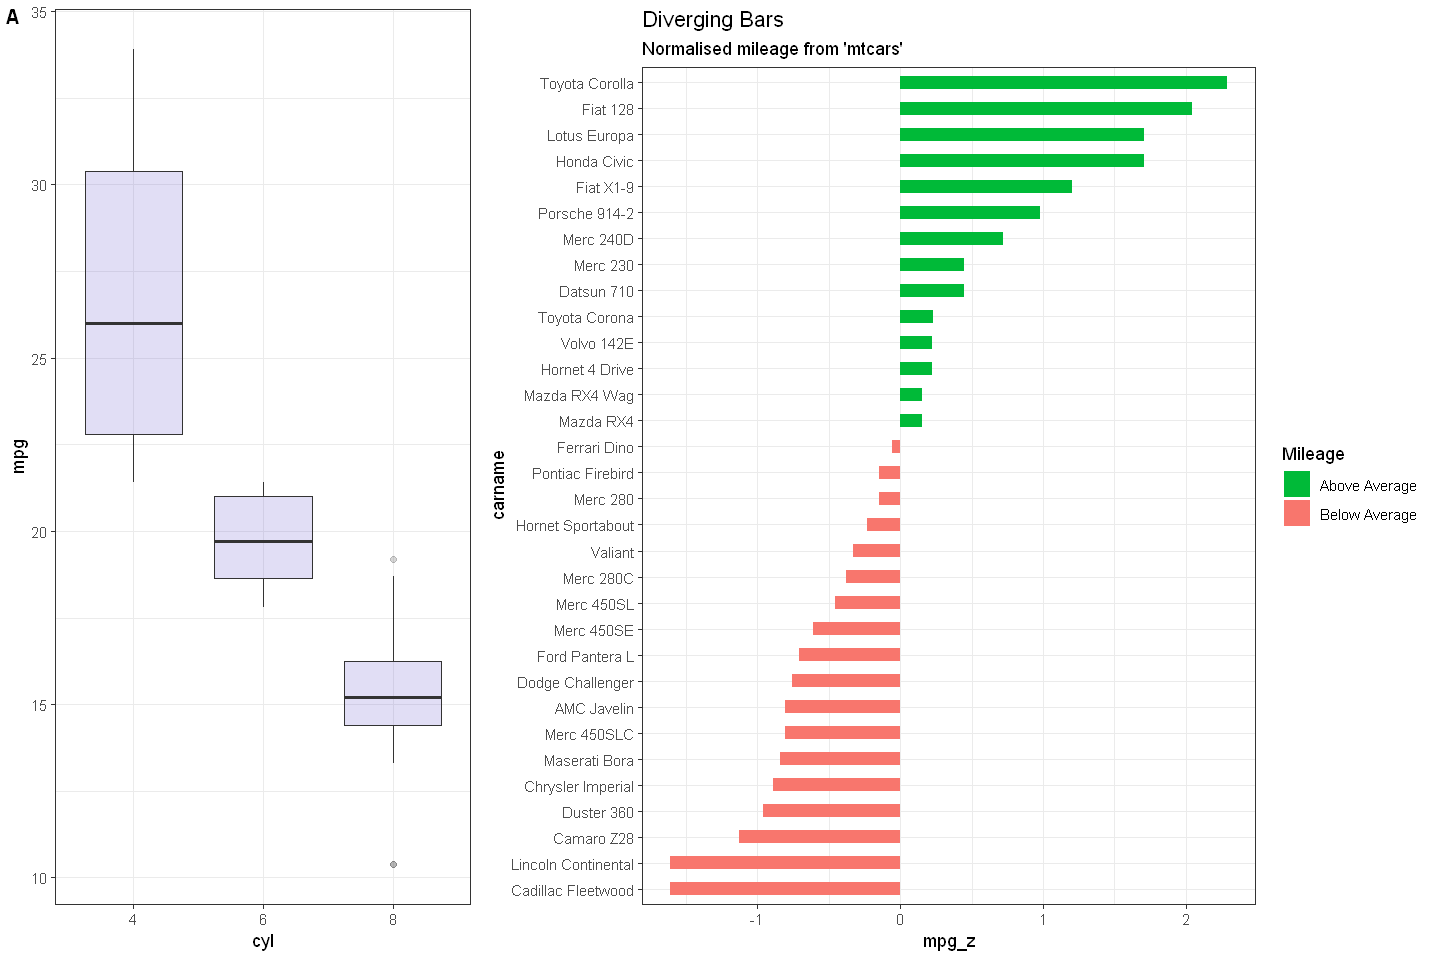

In [71]:

options(repr.plot.width=12, repr.plot.height=8)
plot_grid(p1, p3, labels = c('A', ''), label_size = 12, ncol = 2,  rel_widths = c(1, 2))

# *Note colours are not compatible in the next plot*

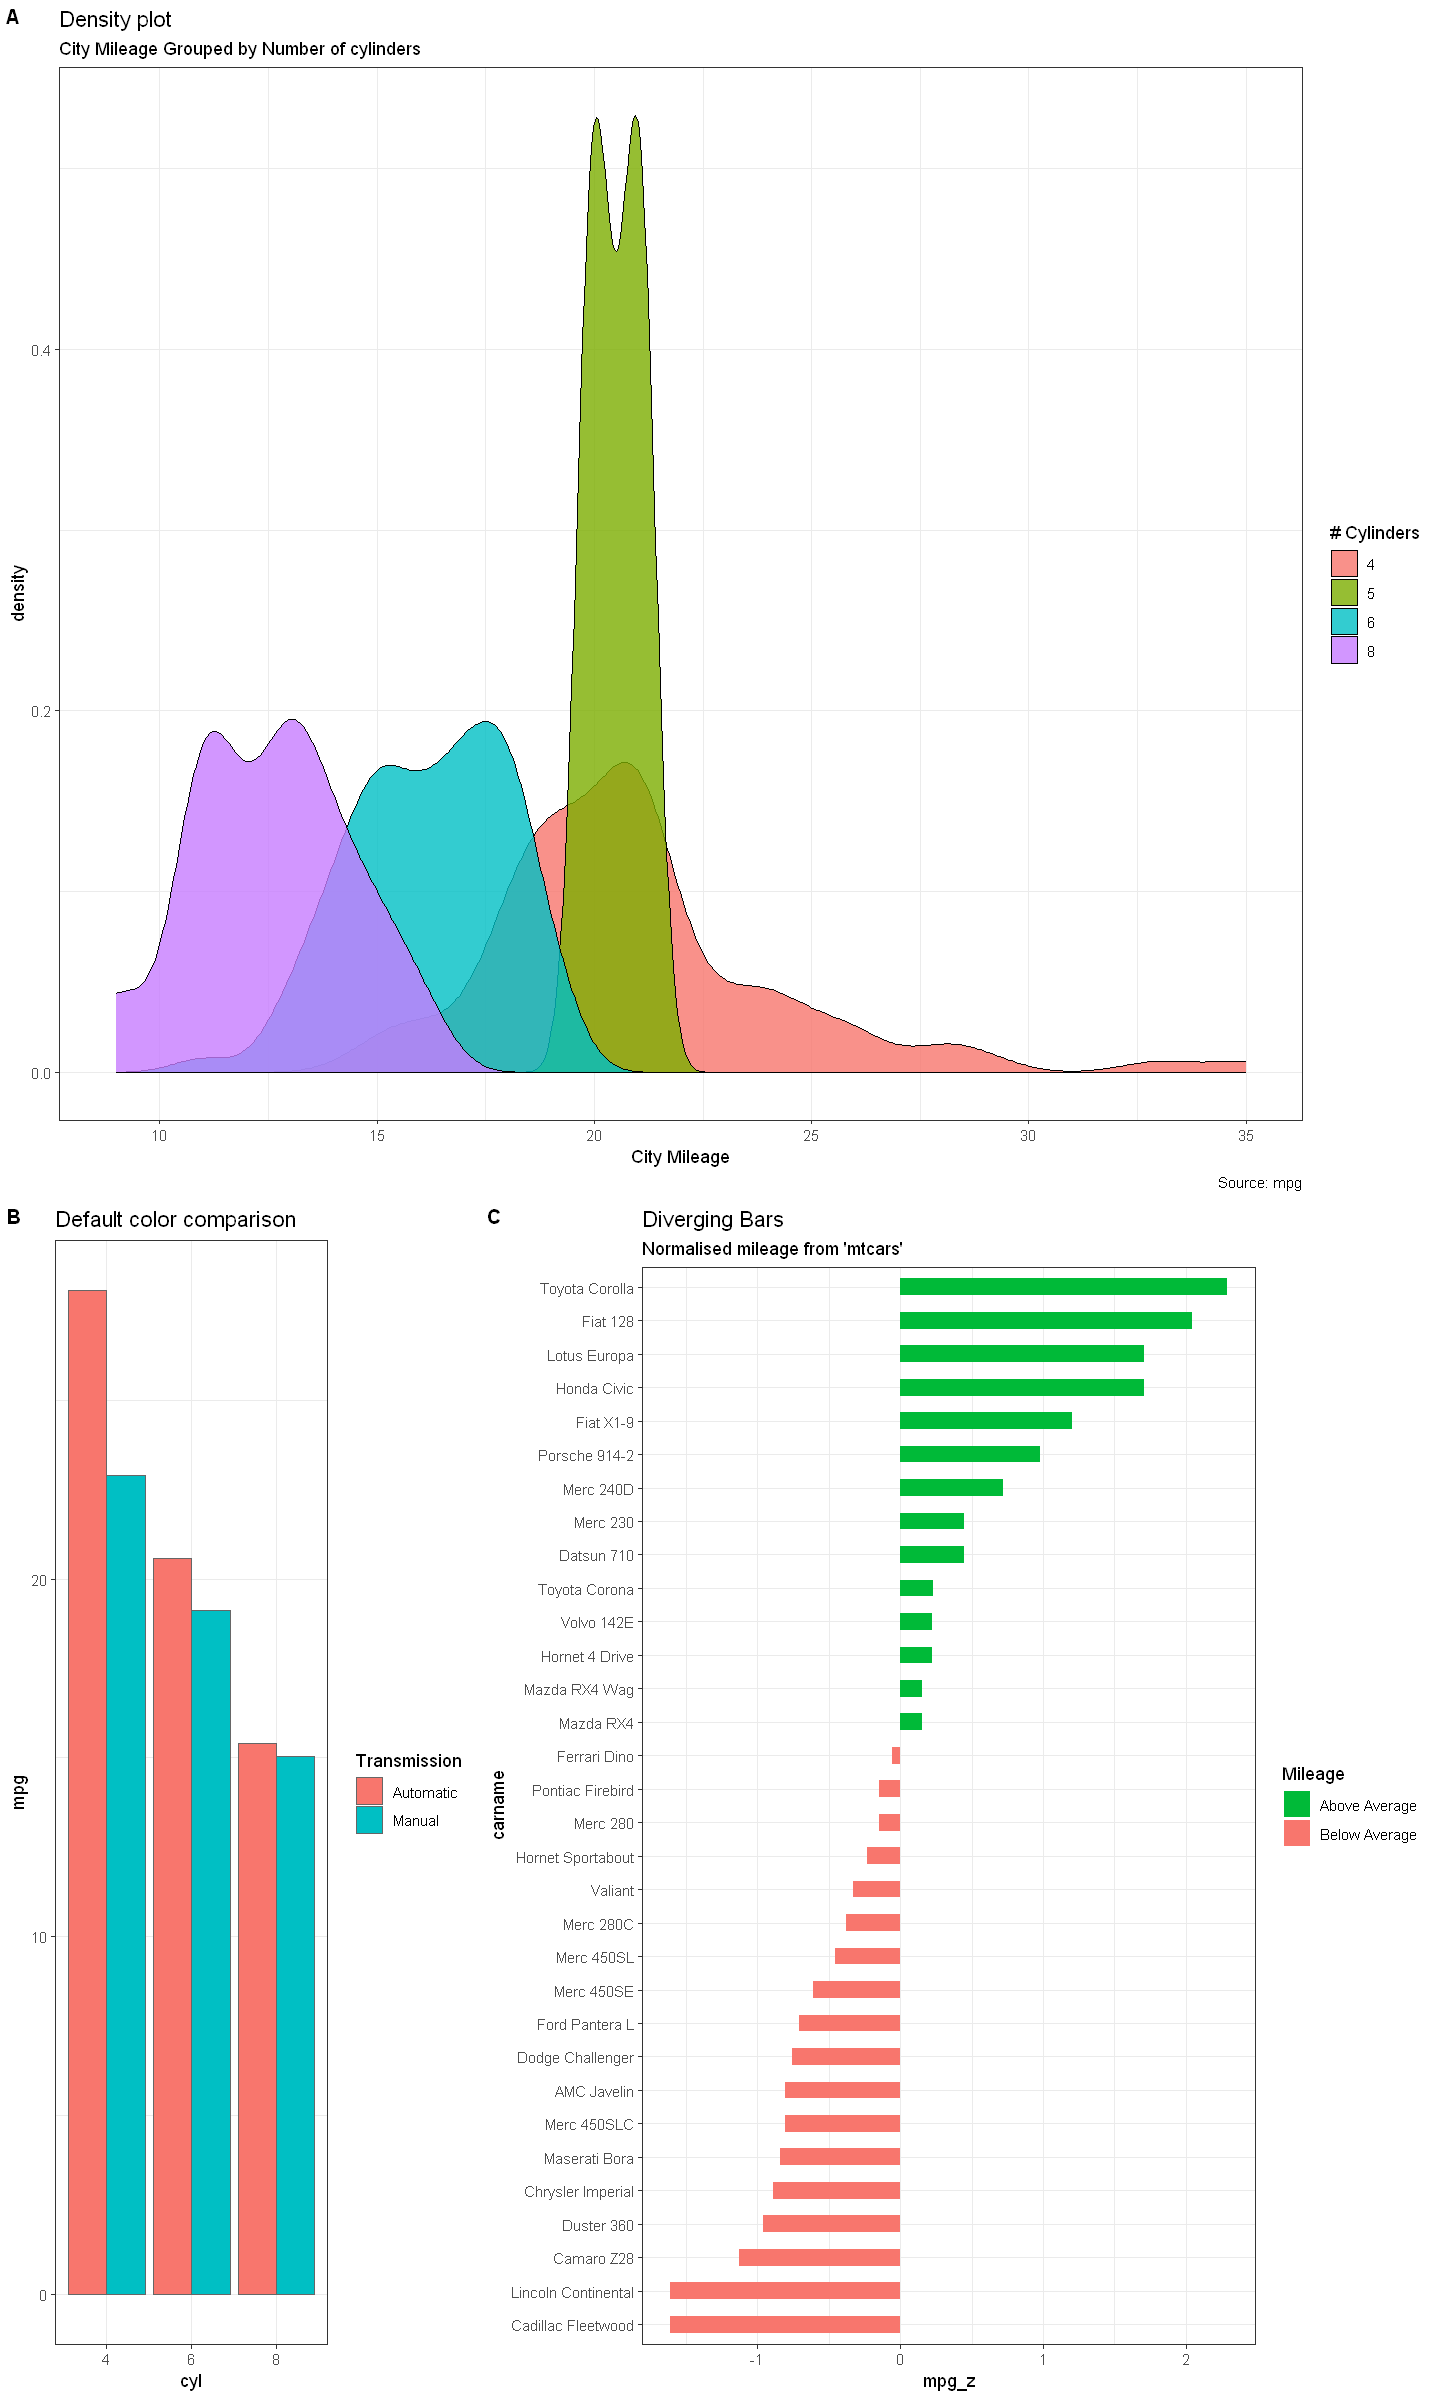

In [72]:
options(repr.plot.width=12, repr.plot.height=20)
bottom_row <- plot_grid(p2, p3, labels = c('B', 'C'), label_size = 12,  rel_widths = c(1, 2))
plot_grid(p5, bottom_row, labels = c('A', ''), label_size = 12, ncol = 1)

## Comparison Charts

### Multi distribution comparisons

 - Overlaid Histograms
 - Back-to-back histograms
 - Small multiples


To draw multiple histograms within a ggplot2 plot, we have to specify the fill to be equal to the grouping variable of our data (i.e. fill = group).

We also have to specify the alpha argument within the geom_histogram function to be smaller than 1. The alpha argument specifies the transparency of our histograms and therefore allows to display multiple histograms overlaying each other.

In [40]:
str(mtcars)

'data.frame':	32 obs. of  14 variables:
 $ mpg     : num  10.4 10.4 13.3 14.3 14.7 15 15.2 15.2 15.5 15.8 ...
 $ cyl     : Factor w/ 3 levels "4","6","8": 3 3 3 3 3 3 3 3 3 3 ...
 $ disp    : num  472 460 350 360 440 ...
 $ hp      : num  205 215 245 245 230 335 180 150 150 264 ...
 $ drat    : num  2.93 3 3.73 3.21 3.23 3.54 3.07 3.15 2.76 4.22 ...
 $ wt      : num  5.25 5.42 3.84 3.57 5.34 ...
 $ qsec    : num  18 17.8 15.4 15.8 17.4 ...
 $ vs      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ am      : num  0 0 0 0 0 1 0 0 0 1 ...
 $ gear    : num  3 3 3 3 3 5 3 3 3 5 ...
 $ carb    : num  4 4 4 4 4 8 3 2 2 4 ...
 $ carname : Factor w/ 32 levels "Cadillac Fleetwood",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ mpg_z   : num  -1.61 -1.61 -1.13 -0.96 -0.89 -0.84 -0.81 -0.81 -0.76 -0.71 ...
 $ mpg_type: chr  "below" "below" "below" "below" ...


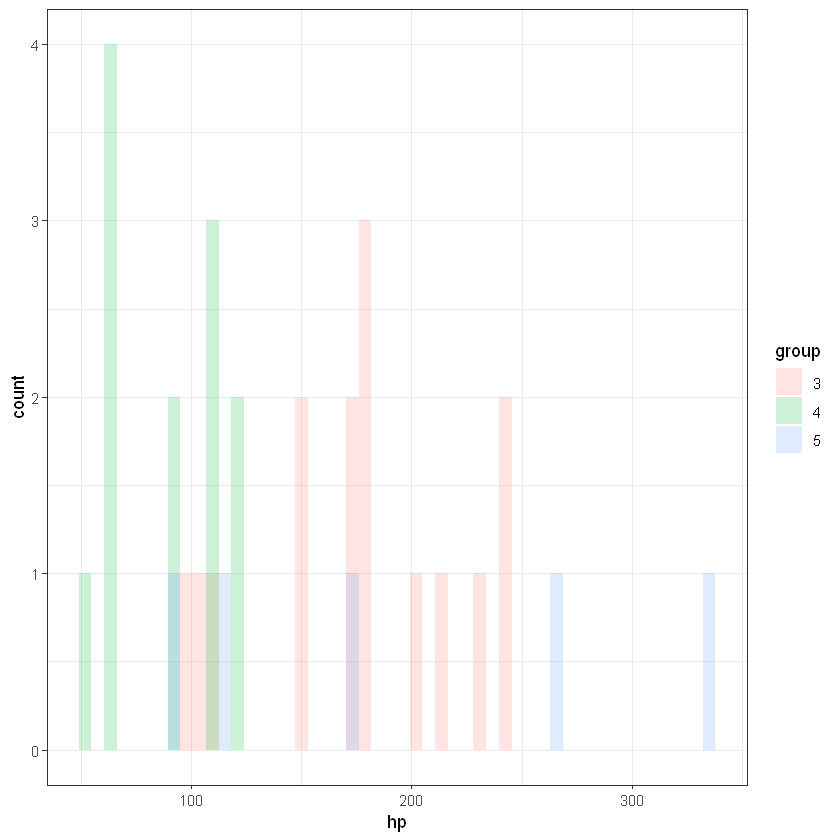

In [41]:
mtcars$group = as.factor(mtcars$gear)
ggplot(mtcars, aes(x = hp, fill = group)) +   
# Draw overlaying histogram
  geom_histogram(position = "identity", alpha = 0.2, bins = 50)

#### *Let's look at a different dataset*

In [73]:
str(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


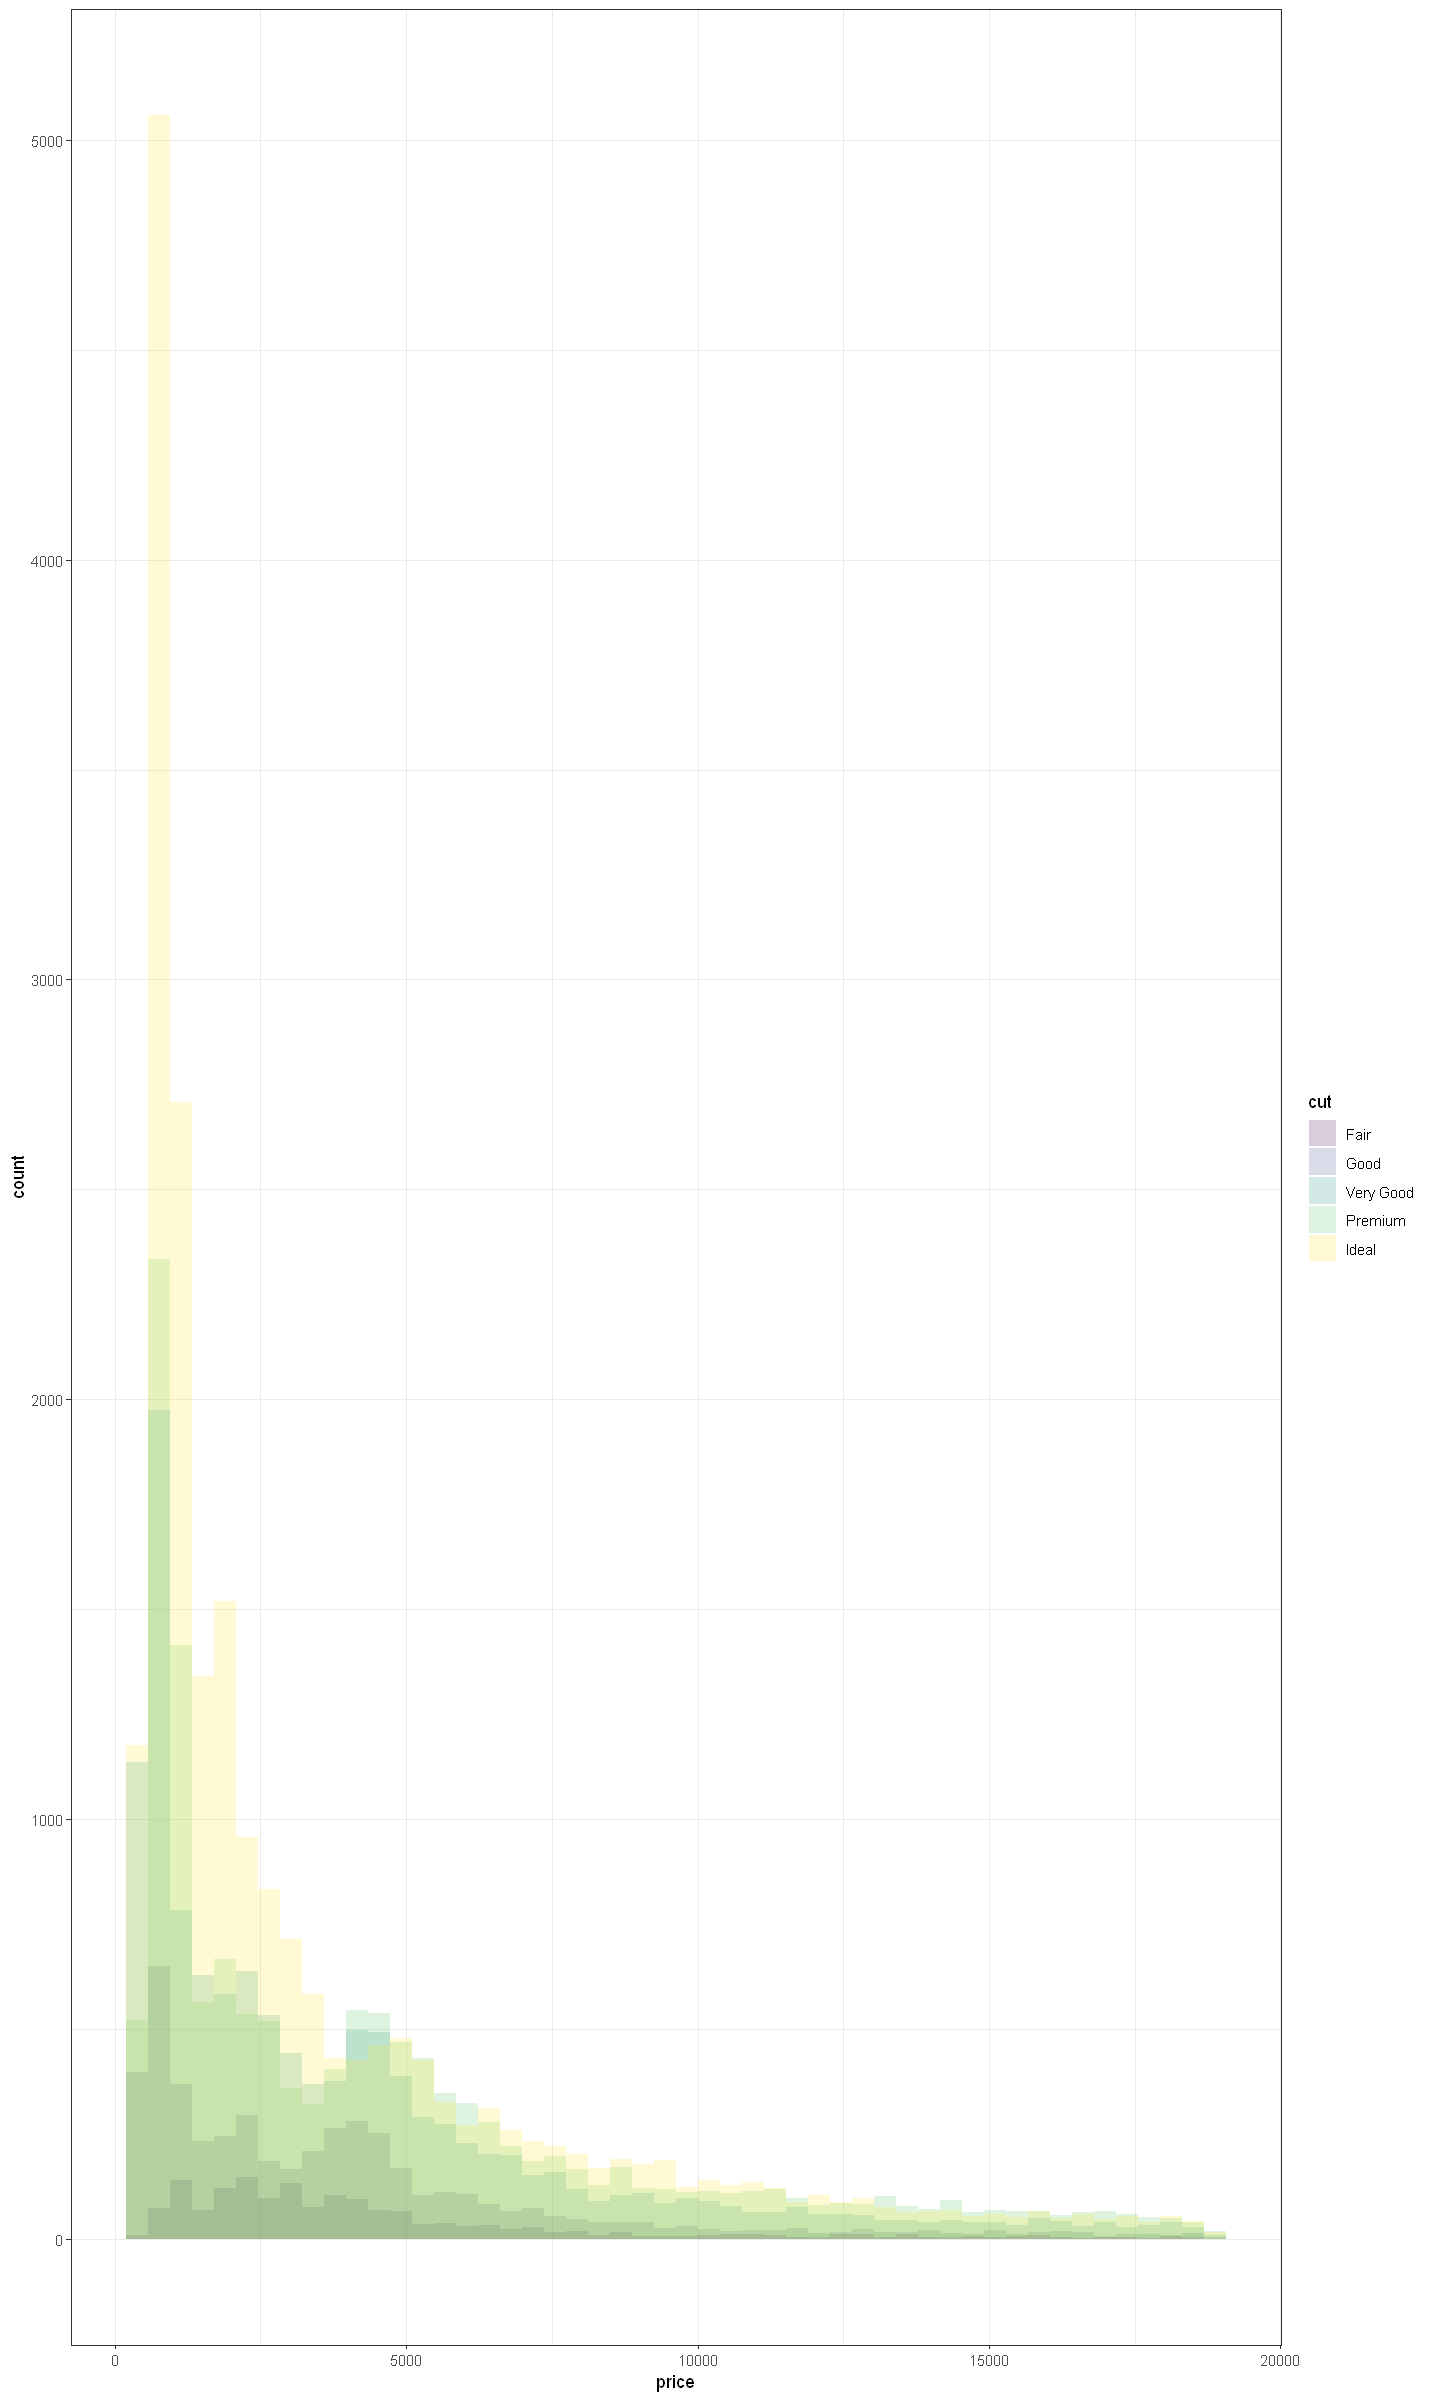

In [74]:
ggplot(diamonds, aes(x = price, fill = cut)) +   
# Draw overlaying histogram
  geom_histogram(position = "identity", alpha = 0.2, bins = 50)

## Aesthetics

ylim(c(0,6))+
 xlab("Miles Per Gallon") + ylab("Weight (Tons)")
 
  ### Change axis lines
  axis.line = element_line(),
  
  ### Change axis ticks text labels: font color, size and face
  
  axis.text = element_text(),       # Change tick labels for all axes
  
  axis.text.x = element_text(),     # Change x axis tick labels only
  
  axis.title.x = element_text(size=18),     # Change x axis title
  
  axis.text.x.top = element_text(), # x axis tick labels on top axis
  
  axis.text.y = element_text(size=14, colour="blue"),     # Change y axis tick labels only
  
  axis.text.y.right = element_text(),# y  axis tick labels on top axis

  
  ### Change axis ticks line: font color, size, linetype and length
  
  axis.ticks = element_line(),      # Change ticks line fo all axes
  
  axis.ticks.x = element_line(),    # Change x axis ticks only
  
  axis.ticks.y = element_line(),    # Change y axis ticks only
  
  axis.ticks.length = unit(3, "pt"), # Change the length of tick marks
  
  panel.border = element_blank(),
  
  panel.background = element_blank()
) 


### Small Multiples

In [44]:
str(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


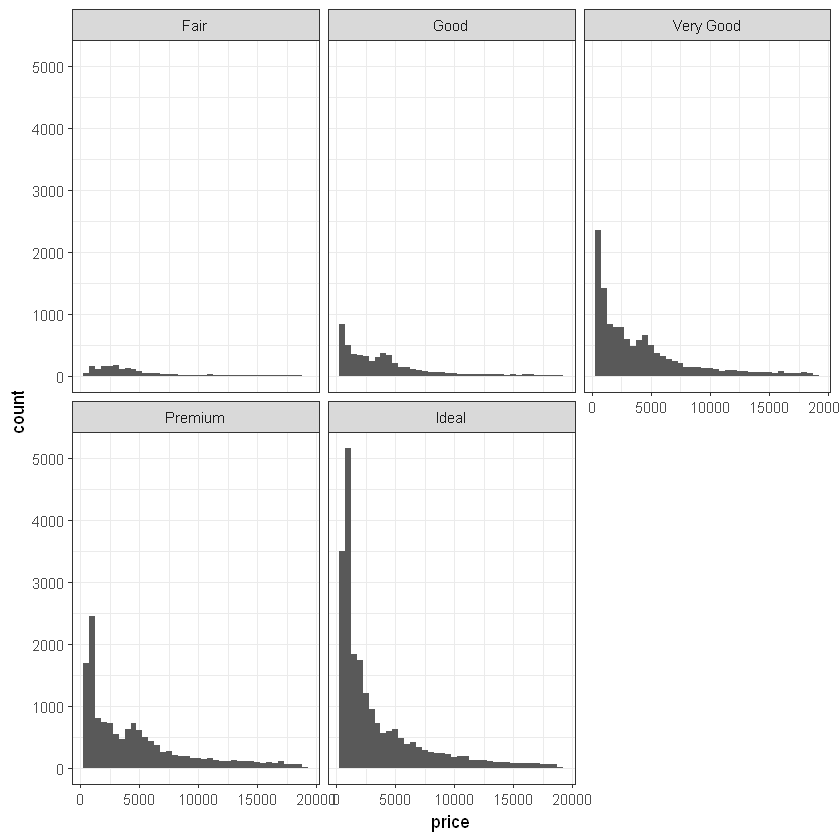

In [45]:

ggplot(data=diamonds, aes(x=price)) +
  geom_histogram(binwidth=500) +
  facet_wrap(~cut)
